In [1]:
import pandas as pd
import matplotlib.pyplot as plt

amazon = pd.read_csv("../cleaned_data/amazon_product_cleaned.csv")
categories = pd.read_csv("../cleaned_data/amazon_categories.csv")
temu = pd.read_csv("../cleaned_data/cleaned_temu_dataset.csv")
amazon.head()

,title,stars,price,listPrice,category_id,boughtInLastMonth,isBestSeller,Discount
0,"Sion Softside Expandable Roller Luggage, Black...",4.5,139.99,139.99,104,2000,False,1.000000
1,Luggage Sets Expandable PC+ABS Durable Suitcas...,4.5,169.99,209.99,104,1000,False,0.809515
2,Platinum Elite Softside Expandable Checked Lug...,4.6,365.49,429.99,104,300,False,0.849997
3,Freeform Hardside Expandable with Double Spinn...,4.6,291.59,354.37,104,400,False,0.822841
4,Winfield 2 Hardside Expandable Luggage with Sp...,4.5,174.99,309.99,104,400,False,0.564502


<Axes: >

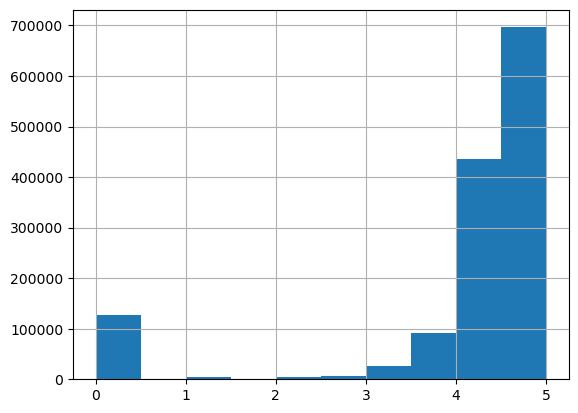

In [2]:
# Histogram of ratings, x: rating, y: amount
amazon['stars'].hist(bins=10)

In [3]:
# Sum of boughtInLastMonth
top_categories = amazon.groupby('category_id')['boughtInLastMonth'].sum().sort_values(ascending=False).head(10)
print(top_categories)

category_id
170    10389600
47      7922500
162     7057850
167     6783500
49      6381300
135     6039300
270     5746350
173     5338750
180     4537250
130     4248500
Name: boughtInLastMonth, dtype: int64


In [4]:
# Combine the products dataset and category dataset
top_categories_df = top_categories.reset_index()
top_categories_df.rename(columns={'category_id': 'id'}, inplace=True)
top_categories_merged = top_categories_df.merge(categories, on='id', how='left')
print(top_categories_merged[['category_name', 'boughtInLastMonth']])

                 category_name  boughtInLastMonth
0             Kitchen & Dining           10389600
1           Hair Care Products            7922500
2      Industrial & Scientific            7057850
3  Household Cleaning Supplies            6783500
4           Skin Care Products            6381300
5           Health & Household            6039300
6                 Toys & Games            5746350
7  Home Storage & Organization            5338750
8                 Dog Supplies            4537250
9           Household Supplies            4248500


<Axes: xlabel='Discount', ylabel='boughtInLastMonth'>

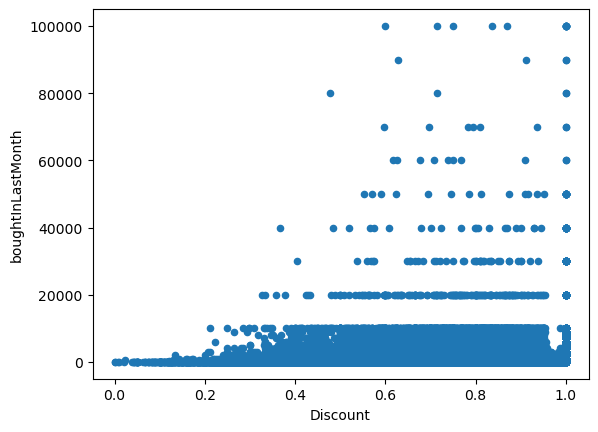

In [5]:
# Sale volume and Discont scatter plot
amazon.plot.scatter(x='Discount', y='boughtInLastMonth')

In [6]:
# Find the top 5 categories with highest and lowest rating
category_ratings = amazon.groupby('category_id')['stars'].mean().sort_values(ascending=False)
category_ratings_df = category_ratings.reset_index()
category_ratings_df.rename(columns={'category_id': 'id'}, inplace=True)
category_ratings_merged = category_ratings_df.merge(categories, on='id', how='left')
print("Top 5 Categories with Highest Average Rating:")
print(category_ratings_merged[['category_name', 'stars']].head())
print("\nTop 5 Categories with Lowest Average Rating:")
print(category_ratings_merged[['category_name', 'stars']].tail())

Top 5 Categories with Highest Average Rating:
             category_name     stars
0               Gift Cards  4.832374
1       Health & Household  4.568067
2  Industrial & Scientific  4.554931
3         Kitchen & Dining  4.544426
4       Household Supplies  4.543045

Top 5 Categories with Lowest Average Rating:
                                       category_name     stars
243  Xbox Series X & S Consoles, Games & Accessories  1.918826
244   Smart Home Thermostats - Compatibility Checker  1.161111
245           Virtual Reality Hardware & Accessories  0.996715
246                                 Kids' Play Boats  0.720438
247                                 Computer Servers  0.638790


In [7]:
# Create the correlation matrix between all the numerical variables
numeric_data = amazon.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                      stars     price  listPrice  category_id  \
stars              1.000000 -0.082226  -0.078568    -0.011327   
price             -0.082226  1.000000   0.994930    -0.036890   
listPrice         -0.078568  0.994930   1.000000    -0.036609   
category_id       -0.011327 -0.036890  -0.036609     1.000000   
boughtInLastMonth  0.062862 -0.027494  -0.026284     0.013987   
Discount          -0.077894  0.024231  -0.027803    -0.029922   

                   boughtInLastMonth  Discount  
stars                       0.062862 -0.077894  
price                      -0.027494  0.024231  
listPrice                  -0.026284 -0.027803  
category_id                 0.013987 -0.029922  
boughtInLastMonth           1.000000 -0.088046  
Discount                   -0.088046  1.000000  


In [8]:
# Do some sexual analysis
amazon = amazon.merge(categories, how='left', left_on='category_id', right_on='id')
amazon = amazon.drop(columns=['category_id', 'id'])

In [9]:
amazon['category_name'] = amazon['category_name'].str.lower().str.strip()

# Subset definitions 
subsets = {
    "men": [
        "men's clothing", "men's accessories", "men's watches", "men's shoes"
    ],
    "women": [
        "women's clothing", "women's handbags", "women's accessories", 
        "women's watches", "women's shoes", "women's jewelry"
    ],
    "kids": [
        "baby & toddler toys", "kids' play trains & trams", "kids' play trucks", 
        "kids' play cars & race cars", "kids' play boats", "kids' party supplies",
        "baby boys' clothing & shoes", "baby girls' clothing & shoes", "toys & games",
        "boys' clothing", "girls' clothing"
    ],
    "general": [
        "household supplies", "beauty & personal care", "computers", "electronics",
        "furniture", "home appliances", "sports & fitness", "tools & home improvement",
        "arts & crafts supplies", "video games"
    ]
}

# Categorize categories into subsets
def categorize_category(category_name):
    for subset, categories in subsets.items():
        if category_name in categories:
            return subset
    return "general"  # Default if no specific subset matches

amazon['target_audience'] = amazon['category_name'].apply(categorize_category)
amazon.head()

,title,stars,price,listPrice,boughtInLastMonth,isBestSeller,Discount,category_name,target_audience
0,"Sion Softside Expandable Roller Luggage, Black...",4.5,139.99,139.99,2000,False,1.000000,suitcases,general
1,Luggage Sets Expandable PC+ABS Durable Suitcas...,4.5,169.99,209.99,1000,False,0.809515,suitcases,general
2,Platinum Elite Softside Expandable Checked Lug...,4.6,365.49,429.99,300,False,0.849997,suitcases,general
3,Freeform Hardside Expandable with Double Spinn...,4.6,291.59,354.37,400,False,0.822841,suitcases,general
4,Winfield 2 Hardside Expandable Luggage with Sp...,4.5,174.99,309.99,400,False,0.564502,suitcases,general


target_audience
kids     105667
women     88207
men       66610
Name: count, dtype: int64


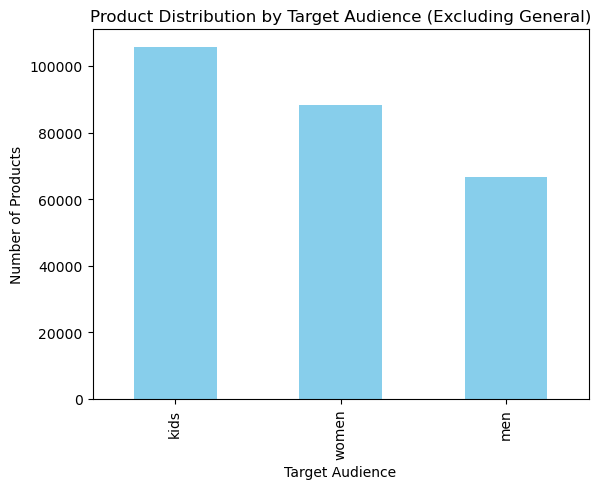

In [10]:
# Filter the data to exclude "General" target audience
filtered_data = amazon[amazon['target_audience'] != 'general']
# Count the number of products in each target audience
audience_distribution = filtered_data['target_audience'].value_counts()
print(audience_distribution)

audience_distribution.plot(kind='bar', color='skyblue', title='Product Distribution by Target Audience (Excluding General)')
plt.xlabel('Target Audience')
plt.ylabel('Number of Products')
plt.show()


target_audience
kids     3.979739
men      4.091323
women    4.040940
Name: stars, dtype: float64


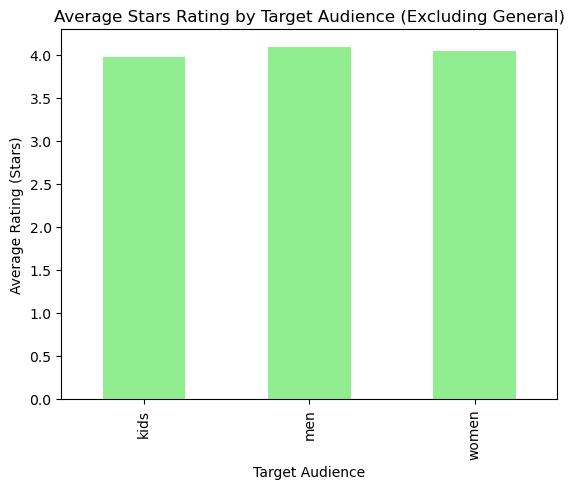

In [11]:
# Average stars rating by target audience
avg_rating_by_audience = filtered_data.groupby('target_audience')['stars'].mean()
print(avg_rating_by_audience)

# Plot the average rating
avg_rating_by_audience.plot(kind='bar', color='lightgreen', title='Average Stars Rating by Target Audience (Excluding General)')
plt.xlabel('Target Audience')
plt.ylabel('Average Rating (Stars)')
plt.show()


target_audience
kids     84.822130
men      45.104339
women    74.224268
Name: boughtInLastMonth, dtype: float64


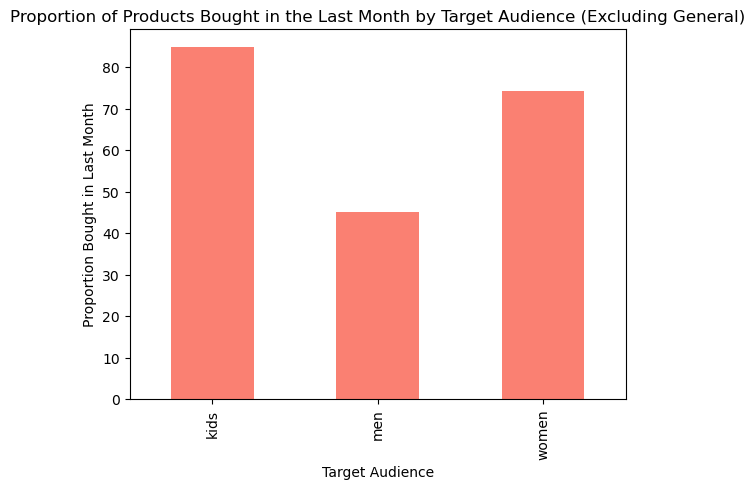

In [12]:
recent_sales = filtered_data.groupby('target_audience')['boughtInLastMonth'].mean()
print(recent_sales)

recent_sales.plot(kind='bar', color='salmon', title='Proportion of Products Bought in the Last Month by Target Audience (Excluding General)')
plt.xlabel('Target Audience')
plt.ylabel('Proportion Bought in Last Month')
plt.show()


target_audience
kids     25.207044
men      75.267237
women    49.709230
Name: price, dtype: float64


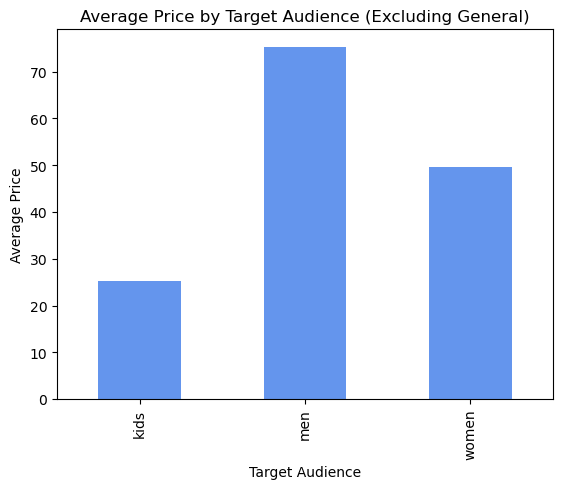

In [13]:
avg_price_by_audience = filtered_data.groupby('target_audience')['price'].mean()
print(avg_price_by_audience)

avg_price_by_audience.plot(kind='bar', color='cornflowerblue', title='Average Price by Target Audience (Excluding General)')
plt.xlabel('Target Audience')
plt.ylabel('Average Price')
plt.show()

In [14]:
amazon_corr = amazon.drop(columns=['title', 'category_name'])
amazon_corr = pd.get_dummies(amazon_corr, columns=['target_audience'], drop_first=True)
# Calculate the correlation matrix
correlation_matrix = amazon_corr.corr()

# Get the correlation of all variables with the 'stars' column
correlation_with_stars = correlation_matrix['stars']

# Display the correlations
print(correlation_with_stars)

stars                    1.000000
price                   -0.082226
listPrice               -0.078568
boughtInLastMonth        0.062862
isBestSeller             0.028571
Discount                -0.077894
target_audience_kids    -0.005452
target_audience_men      0.014431
target_audience_women    0.006950
Name: stars, dtype: float64


In [15]:
from fuzzywuzzy import fuzz
temu['leve_1_category_name'] = temu['leve_1_category_name'].str.lower().str.strip()
temu['leve_2_category_name'] = temu['leve_2_category_name'].str.lower().str.strip()
categories['category_name'] = categories['category_name'].str.lower().str.strip()

# Define a function to calculate similarity
def calculate_similarity(temu_categories, amazon_categories):
    scores = []
    for amazon_cat in amazon_categories:
        max_score = max([fuzz.ratio(amazon_cat, temu_cat) for temu_cat in temu_categories])
        scores.append(max_score)
    return sum(scores) / len(scores)  # Average similarity score

# Compare similarity for leve_1 and leve_2
leve_1_similarity = calculate_similarity(temu['leve_1_category_name'].unique(), categories['category_name'])
leve_2_similarity = calculate_similarity(temu['leve_2_category_name'].unique(), categories['category_name'])

print(f"Average Similarity for Level 1: {leve_1_similarity:.2f}")
print(f"Average Similarity for Level 2: {leve_2_similarity:.2f}")

if leve_1_similarity > leve_2_similarity:
    print("Level 1 categories align more closely with Amazon's categories.")
    temu['selected_category'] = temu['leve_1_category_name']
else:
    print("Level 2 categories align more closely with Amazon's categories.")
    temu['selected_category'] = temu['leve_2_category_name']

/opt/anaconda3/lib/python3.12/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Average Similarity for Level 1: 51.69
Average Similarity for Level 2: 68.06
Level 2 categories align more closely with Amazon's categories.


In [16]:
temu.columns = temu.columns.str.lower().str.strip()
categories.columns = categories.columns.str.lower().str.strip()

temu_level_2 = temu['leve_2_category_name'].unique()

amazon_categories = categories['category_name'].unique()

# Define a function to map the most similar categories using fuzzy matching
def map_categories(temu_categories, amazon_categories):
    mapping = {}
    for temu_cat in temu_categories:
        max_score = 0
        best_match = None
        for amazon_cat in amazon_categories:
            score = fuzz.ratio(temu_cat, amazon_cat)  # Calculate similarity score
            if score > max_score:  # Find the best match with the highest similarity score
                max_score = score
                best_match = amazon_cat
        mapping[temu_cat] = {'amazon_category': best_match, 'similarity': max_score}
    return mapping

# Perform the mapping
category_mapping = map_categories(temu_level_2, amazon_categories)
temu['category_name'] = temu['leve_2_category_name'].map(lambda x: category_mapping.get(x, {}).get('amazon_category', 'Unknown'))
temu = temu.drop(columns=['leve_1_category_name', 'leve_2_category_name']) 

In [17]:
# Step 1: Find top 10 categories in Temu based on total sales volume
top_10_categories_temu = temu.groupby('category_name')['sales_volume'].sum().sort_values(ascending=False).head(10)

# Step 2: Find top 10 categories in Amazon based on total sales (boughtInLastMonth)
top_10_categories_amazon = amazon.groupby('category_name')['boughtInLastMonth'].sum().sort_values(ascending=False).head(10)

# Step 3: Display the results
print("Top 10 Categories in Temu:")
print(top_10_categories_temu)

print("\nTop 10 Categories in Amazon:")
print(top_10_categories_amazon)



Top 10 Categories in Temu:
category_name
kitchen & dining                   702223.0
women's jewelry                    545362.0
home storage & organization        410024.0
women's shoes                      308047.0
women's accessories                214516.0
men's shoes                        214100.0
men's accessories                  185508.0
girls' shoes                       177482.0
arts & crafts supplies             167196.0
foot, hand & nail care products    159748.0
Name: sales_volume, dtype: float64

Top 10 Categories in Amazon:
category_name
kitchen & dining               10389600
hair care products              7922500
industrial & scientific         7057850
household cleaning supplies     6783500
skin care products              6381300
health & household              6039300
toys & games                    5746350
home storage & organization     5338750
dog supplies                    4537250
household supplies              4248500
Name: boughtInLastMonth, dtype: int64


                    category_name  temu_avg_price  amazon_avg_price
0   abrasive & finishing products        4.967246         25.351431
1          accessories & supplies       11.747224         44.740726
2          arts & crafts supplies        2.992325         14.618176
3   arts, crafts & sewing storage        3.379420         22.599569
4    automotive tools & equipment        9.431283         54.303712
..                            ...             ...               ...
85               women's clothing        4.189215         39.473782
86               women's handbags        8.231832         61.012419
87                women's jewelry        2.826185         32.467806
88                  women's shoes        8.877066         89.444289
89                women's watches       10.245863         93.930286

[90 rows x 3 columns]


<Figure size 1500x800 with 0 Axes>

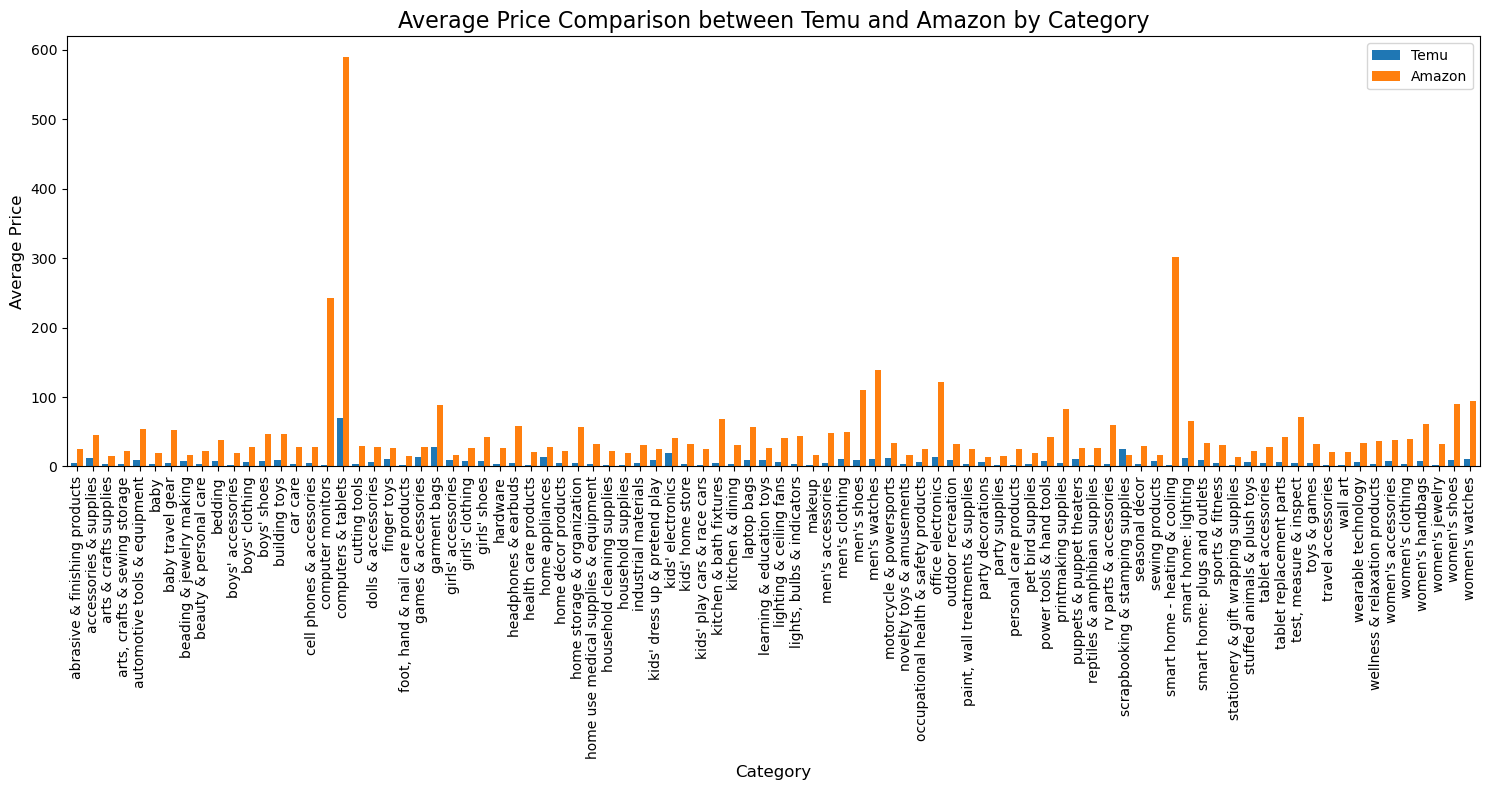

In [18]:
common_categories = set(temu['category_name'].unique()) & set(amazon['category_name'].unique())
temu_filtered = temu[temu['category_name'].isin(common_categories)]
amazon_filtered = amazon[amazon['category_name'].isin(common_categories)]

temu_avg_price = temu_filtered.groupby('category_name')['price'].mean()
amazon_avg_price = amazon_filtered.groupby('category_name')['listPrice'].mean()

# Merge average prices for comparison
price_comparison = pd.DataFrame({
    'temu_avg_price': temu_avg_price,
    'amazon_avg_price': amazon_avg_price
}).reset_index()

print(price_comparison)

# Plot the data
plt.figure(figsize=(15, 8))
price_comparison.set_index('category_name').plot(kind='bar', figsize=(15, 8), width=0.8)

# Add titles and labels
plt.title('Average Price Comparison between Temu and Amazon by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=90, ha='center') 
plt.legend(['Temu', 'Amazon'])
plt.tight_layout() 
plt.show()


In [19]:
temu_avg_price = temu['price'].mean()
amazon_avg_price = amazon['listPrice'].mean()

# Print the overall average prices
print(f"Average price in Temu: {temu_avg_price}")
print(f"Average price in Amazon: {amazon_avg_price}")


Average price in Temu: 6.327352904897003
Average price in Amazon: 47.27561038480012


<Figure size 1500x800 with 0 Axes>

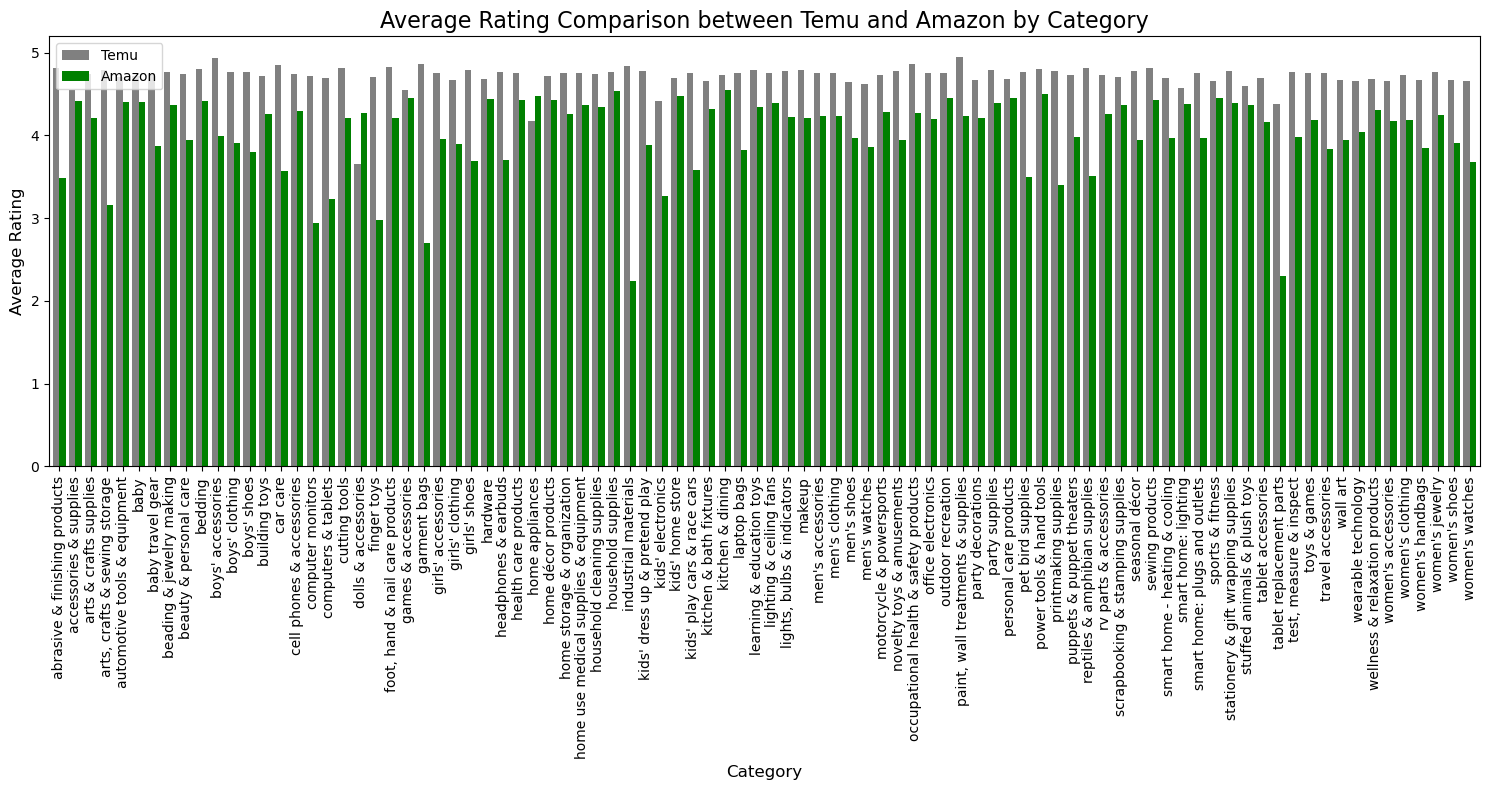

In [20]:
temu_avg_rating = temu_filtered.groupby('category_name')['goods_score'].mean()
amazon_avg_rating = amazon_filtered.groupby('category_name')['stars'].mean()

rating_comparison = pd.DataFrame({
    'temu_avg_rating': temu_avg_rating,
    'amazon_avg_rating': amazon_avg_rating
}).reset_index()

# Plot the data
plt.figure(figsize=(15, 8)) 
rating_comparison.set_index('category_name').plot(kind='bar', figsize=(15, 8), width=0.8, color=['grey', 'green'])
plt.title('Average Rating Comparison between Temu and Amazon by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=90, ha='center') 
plt.legend(['Temu', 'Amazon'])
plt.tight_layout()
plt.show()

In [21]:
temu_avg_rating = temu['goods_score'].mean()

amazon_avg_rating = amazon['stars'].mean()
    
print(f"Average rating in Temu: {temu_avg_rating}")
print(f"Average rating in Amazon: {amazon_avg_rating}")

Average rating in Temu: 4.720441593684471
Average rating in Amazon: 4.005189528774762


In [22]:
amazon['category_name'].unique()

array(['suitcases', "men's clothing",
       'xbox 360 games, consoles & accessories', "men's shoes",
       "men's accessories", 'vacuum cleaners & floor care',
       'televisions & video products', 'additive manufacturing products',
       'headphones & earbuds',
       'playstation vita games, consoles & accessories',
       'wii u games, consoles & accessories',
       'playstation 4 games, consoles & accessories', "boys' watches",
       "girls' clothing", "boys' clothing",
       'pregnancy & maternity products',
       'shaving & hair removal products', 'fabric decorating',
       'industrial materials', 'smart home: security cameras and systems',
       'office electronics', 'sports & outdoor play toys',
       "kids' play tractors", 'slot cars, race tracks & accessories',
       'video games', 'smart home: voice assistants and hubs',
       'light bulbs', 'toys & games', "kids' furniture",
       'automotive tires & wheels', 'wellness & relaxation products',
       'automotiv

In [23]:
temu['category_name'] = temu['category_name'].str.lower()
amazon['category_name'] = amazon['category_name'].str.lower()

# Subset definitions in lowercase
subsets = {
    "men": [
        "men's clothing", "men's accessories", "men's watches", "men's shoes"
    ],
    "women": [
        "women's clothing", "women's handbags", "women's accessories", 
        "women's watches", "women's shoes", "women's jewelry"
    ],
    "kids": [
        "baby & toddler toys", "kids' play trains & trams", "kids' play trucks", 
        "kids' play cars & race cars", "kids' play boats", "kids' party supplies",
        "baby boys' clothing & shoes", "baby girls' clothing & shoes", "toys & games",
        "boys' clothing", "girls' clothing"
    ],
    "general": [
        "household supplies", "beauty & personal care", "computers", "electronics",
        "furniture", "home appliances", "sports & fitness", "tools & home improvement",
        "arts & crafts supplies", "video games"
    ]
}

temu['target_audience'] = temu['category_name'].apply(categorize_category)

print(temu['target_audience'].value_counts())
print(amazon['target_audience'].value_counts())



target_audience
general    36793
women      29166
men        12708
kids        2403
Name: count, dtype: int64
target_audience
general    1132629
kids        105667
women        88207
men          66610
Name: count, dtype: int64


  target_audience  temu_avg_price  amazon_avg_price
0         general        5.218548         46.486342
1            kids        5.912534         26.856737
2             men        8.137912         82.926906
3           women        6.971408         54.948661


<Figure size 1000x600 with 0 Axes>

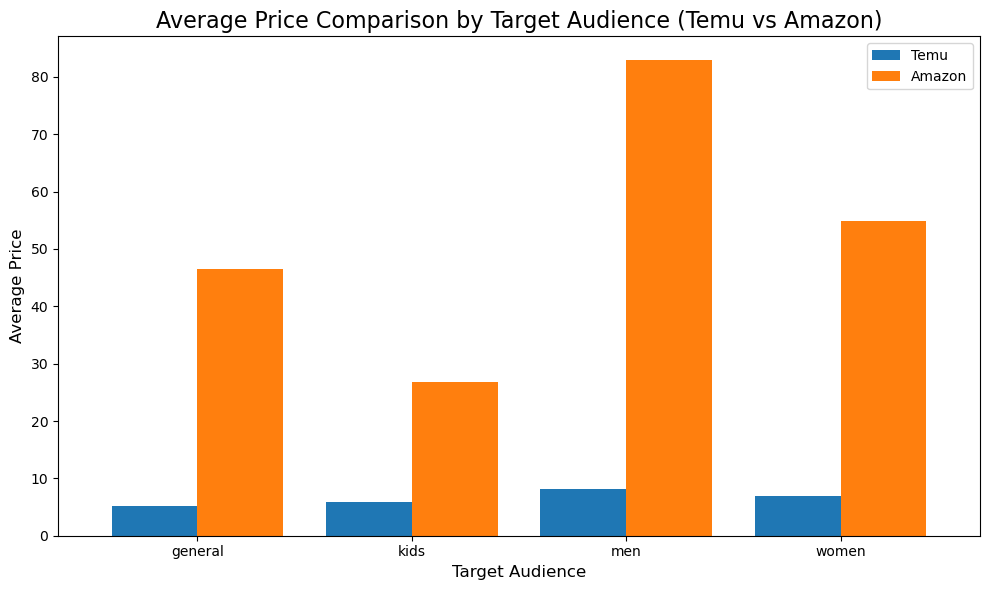

In [24]:
temu_avg_price_by_audience = temu.groupby('target_audience')['price'].mean()

amazon_avg_price_by_audience = amazon.groupby('target_audience')['listPrice'].mean()

subset_price_comparison = pd.DataFrame({
    'temu_avg_price': temu_avg_price_by_audience,
    'amazon_avg_price': amazon_avg_price_by_audience
}).reset_index()

print(subset_price_comparison)

plt.figure(figsize=(10, 6))
subset_price_comparison.set_index('target_audience').plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Average Price Comparison by Target Audience (Temu vs Amazon)', fontsize=16)
plt.xlabel('Target Audience', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Temu', 'Amazon'])
plt.tight_layout()
plt.show()
